# K-Means Clustering

In [188]:
# Importing library
# Adding Preliminary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [175]:
#Importing Dataset (Wine dataset) and creating Dataframe using Pandas

wine = datasets.load_wine()
wine_data = pd.DataFrame(wine.data)
wine_data.columns = wine.feature_names
wine_data['Type']=wine.target
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [176]:
#Retreiving Independant variables from Data set to X
wine_X = wine_data.drop('Type', axis=1)
wine_X = np.array(wine_X)
wine_X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [177]:
#Now Retreiving Target Variable Type into Y
wine_Y = wine_data.Type
wine_Y = np.array(wine_Y)
wine_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [178]:
#Implementing K-Means model on our Wine Dataset, Seting K (Cluster) size to 3

kmeans = KMeans(n_clusters=3,n_init=10)
Kmeans_Model = kmeans.fit(wine_X)
Kmeans_Model.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [179]:
#Calculating SSE value for K

kmeans_args = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 0,
}

SSE = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(wine_X)
    SSE.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

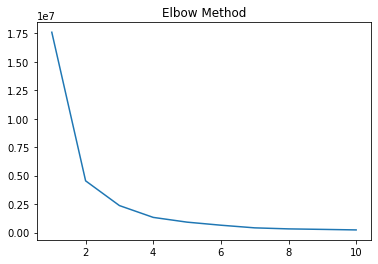

In [180]:
# Ploting of SSE for elbow technique to determine value of K

plt.plot(range(1, 11), SSE)
plt.title('Elbow Method')


In [181]:
print("Using Elbow Technique we find out that K manually is 3")

Using Elbow Technique we find out that K manually is 3


In [182]:
#Confriming Vlaue of K using Kneed methong to determine elbow bending point

kneed_val = KneeLocator(
    range(1, 11), SSE, curve="convex", direction="decreasing"
)

print("Value of K using Elbow Technique Programmatically is", kneed_val.elbow)

Value of K using Elbow Technique Programmatically is 3


In [183]:
#Model Score splitting training and testing data

X_train,X_test,y_train,y_test=train_test_split(wine_X,wine_Y,random_state=0)

In [185]:
#Using LogisticRegression 

logreg = LogisticRegression(max_iter=3000)

# fit the model with data
logreg = logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

print("Model Score:",logreg.score(X_test,y_test))

Model Score: 0.9777777777777777


# Using PCA reducing the Model to 2 features

In [191]:
#Reducing Model to 2
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(wine_X)
# pca_2_result

In [192]:
#Implementing K-Means model on our Wine Dataset after PCA2, Seting K (Cluster) size to 3

kmeans_PCA2 = KMeans(n_clusters=3,random_state=0)
Kmeans_Model_PCA2 = kmeans_PCA2.fit(pca_2_result)
Kmeans_Model_PCA2.labels_


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [193]:
#Calculating SSE value for K using PCA_Data

kmeans_PCA2_args = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 0,
}

SSE_PCA2 = []
for k  in range (1,11):
    kmeans_PCA2 = KMeans(n_clusters=k, **kmeans_PCA2_args)
    kmeans_PCA2.fit(pca_2_result)
    SSE_PCA2.append(kmeans_PCA2.inertia_)

Text(0.5, 1.0, 'Elbow Method')

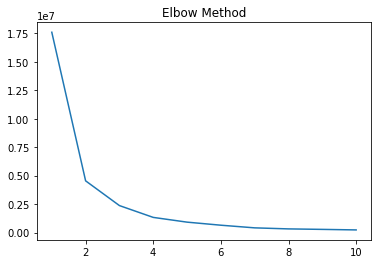

In [194]:
# Ploting of SSE for elbow technique to determine value of K

plt.plot(range(1, 11), SSE_PCA2)
plt.title('Elbow Method')


In [195]:
print("Using Elbow Technique we find out that K manually is 3")

Using Elbow Technique we find out that K manually is 3


In [196]:
#Confriming Vlaue of K using Kneed methong to determine elbow bending point

kneed_val = KneeLocator(
    range(1, 11), SSE_PCA2, curve="convex", direction="decreasing"
)

print("Value of K using Elbow Technique Programmatically is", kneed_val.elbow)

Value of K using Elbow Technique Programmatically is 3


In [197]:
#Model Score splitting training and testing data of PCA2

X_train,X_test,y_train,y_test=train_test_split(pca_2_result,wine_Y,random_state=0)

In [198]:
#Using LogisticRegression 

logreg = LogisticRegression(max_iter=300)

# fit the model with data
logreg = logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

print("Model Score with PCA2:",logreg.score(X_test,y_test))

Model Score with PCA2: 0.8222222222222222
